In [1]:
import pandas as pd
from collections import Counter
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
plt.rcParams.update({'font.size': 15})

In [3]:
metadata = pd.read_csv('~/data/metadata.txt', sep='\t', index_col=0)
metadata.head()

,age,race,sex,cmv,hla
sample_id,,,,,
HIP08653,52.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*07,B*08"
HIP13276,53.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*08"
HIP14114,57.0,"caucasian,non-hispanic or latino",female,-,"A*01,A*02,B*07,B*15"
HIP03370,41.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*02,B*07,B*52"
HIP13015,39.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*57"


In [40]:
files_all = os.listdir('../../data/cmv')
# files_all = os.listdir('../../data/cmv_VDJtools_format_tmp')

samples_0 = [f[:8] for f in files_all if f[:3] == 'HIP'] 
samples = [s for s in samples_0 if metadata.loc[s, 'cmv'] == '+' or metadata.loc[s, 'cmv'] == '-']
len(samples)

641

In [22]:
i = 0

for test_s in samples:
    
    all_cdr3s = pd.read_csv('~/data/cmv_VDJtools_format_reads/{}.tsv'.format(test_s), sep='\t')
    
    metadata.loc[test_s, 'sum_count'] = all_cdr3s['count'].sum()
    metadata.loc[test_s, 'sum_count_1000'] = all_cdr3s.nlargest(1000, 'count')['count'].sum()
    metadata.loc[test_s, 'freq_1000'] = metadata.loc[test_s, 'sum_count_1000'] / metadata.loc[test_s, 'sum_count']
    metadata.loc[test_s, 'sum_count_10000'] = all_cdr3s.nlargest(10000, 'count')['count'].sum()
    metadata.loc[test_s, 'freq_10000'] = metadata.loc[test_s, 'sum_count_10000'] / metadata.loc[test_s, 'sum_count']
    metadata.loc[test_s, 'unique_TCR'] = len(all_cdr3s)
    
    try:
        found_cdr3s = pd.read_csv('~/data/database_with_cmv/res/{}.{}.txt'.format(test_s, test_s), sep='\t')
        found_cdr3s = found_cdr3s.drop_duplicates(subset=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j'])
        
        metadata.loc[test_s, 'CMV_unique'] = len(found_cdr3s)
        metadata.loc[test_s, 'CMV_count'] = found_cdr3s['count'].sum()
        
    except FileNotFoundError:
        metadata.loc[test_s, 'CMV_unique'] = 0
        metadata.loc[test_s, 'CMV_count'] = 0
    
    i += 1
    if i % 10 == 0:
        print(i, end=' ')

10 20 30 40 50 60 70 

In [7]:
metadata.head()

,age,race,sex,cmv,hla,sum_count,sum_count_1000,freq_1000,sum_count_10000,freq_10000,unique_TCR,CMV_unique,CMV_count
sample_id,,,,,,,,,,,,,
HIP08653,52.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*07,B*08",442086.0,60699.0,0.137301,111230.0,0.251603,274757.0,935.0,1990.0
HIP13276,53.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*08",0.0,0.0,NaN,0.0,NaN,198415.0,0.0,0.0
HIP14114,57.0,"caucasian,non-hispanic or latino",female,-,"A*01,A*02,B*07,B*15",165447.0,39560.0,0.239110,69647.0,0.420963,91166.0,318.0,475.0
HIP03370,41.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*02,B*07,B*52",453024.0,65670.0,0.144959,100294.0,0.221388,314166.0,1181.0,2077.0
HIP13015,39.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*57",460832.0,33927.0,0.073621,68521.0,0.148690,347050.0,1265.0,1716.0


In [51]:
meta_s = metadata.loc[samples]
meta_s['col'] = np.where(meta_s['cmv'] == '+', 'red', 'blue')
meta_s.head()

,age,race,sex,cmv,hla,sum_count,sum_count_1000,freq_1000,sum_count_10000,freq_10000,unique_TCR,CMV_unique,CMV_count,col
sample_id,,,,,,,,,,,,,,
HIP13396,56.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*57,B*73",450629.0,36881.0,0.081843,68356.0,0.151690,344898.0,1059.0,1319.0,red
HIP12165,17.0,non-hispanic or latino,male,+,"A*02,A*24,B*27,B*35",114984.0,9122.0,0.079333,27936.0,0.242956,91165.0,342.0,438.0,red
HIP02103,10.0,"caucasian,non-hispanic or latino",male,-,"A*11,A*31,B*07,B*07",397599.0,13727.0,0.034525,44697.0,0.112417,323188.0,1082.0,1461.0,blue
HIP10480,11.0,NaN,female,+,"A*03,A*03,B*50,B*55",380693.0,45131.0,0.118550,76442.0,0.200797,283274.0,1082.0,1356.0,red
HIP04605,56.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*26,B*08,B*22",360497.0,46350.0,0.128572,83226.0,0.230865,248702.0,774.0,1049.0,red


In [52]:
len(meta_s)

641

In [53]:
meta_s = meta_s.drop(['HIP13515'])
len(meta_s)

640

Text(0.5, 1.0, 'Unique TCRs')

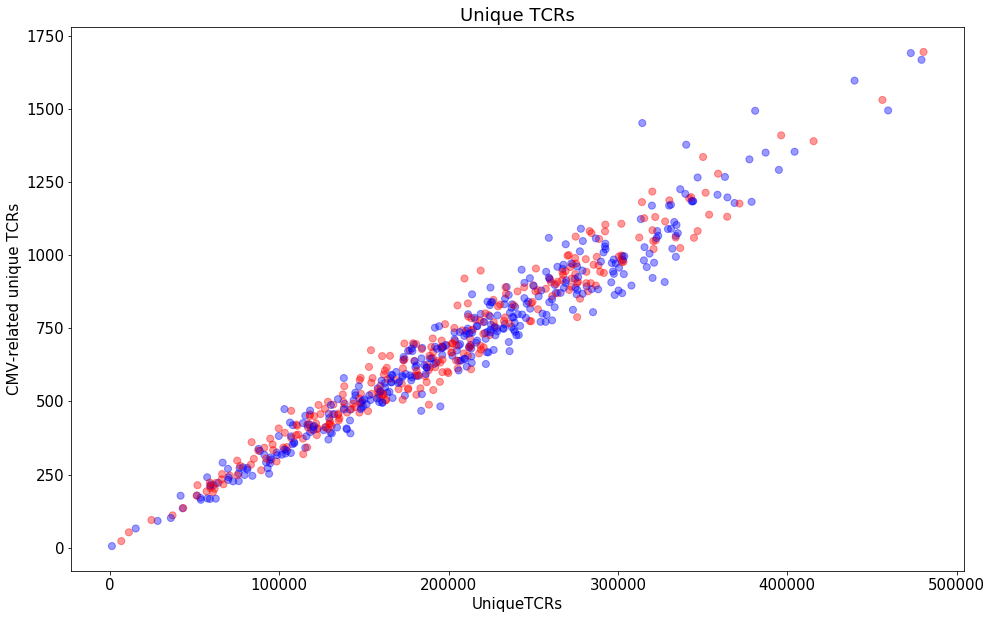

In [62]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['CMV_unique'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related unique TCRs')
plt.title('Unique TCRs')

Text(0.5, 1.0, 'Sums TCRs')

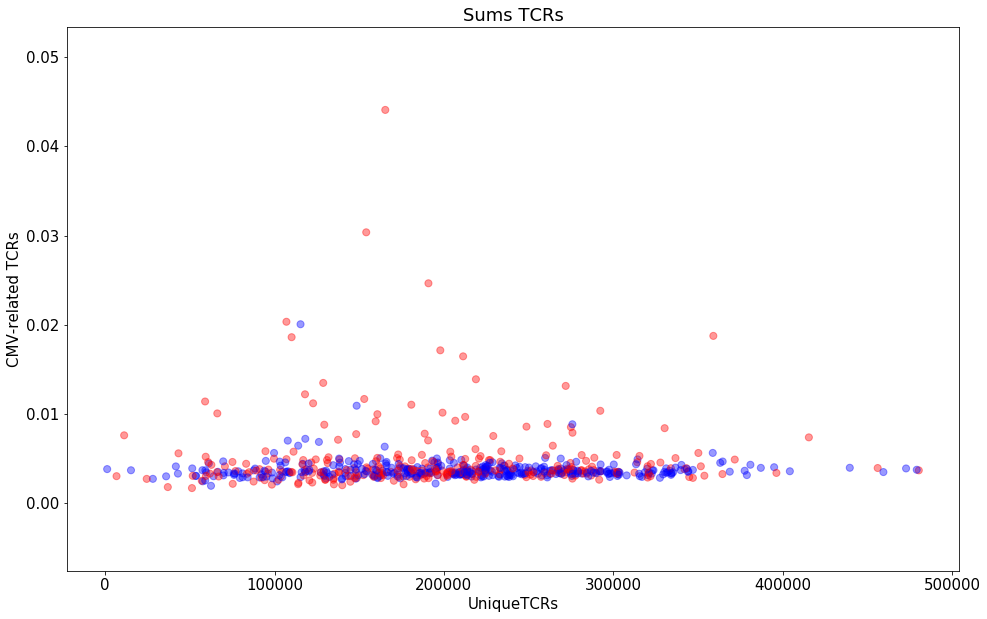

In [63]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['CMV_count'] / meta_s['sum_count'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related TCRs frequencies')
plt.title('Sums TCRs')

Text(0.5, 1.0, 'Sums TCRs')

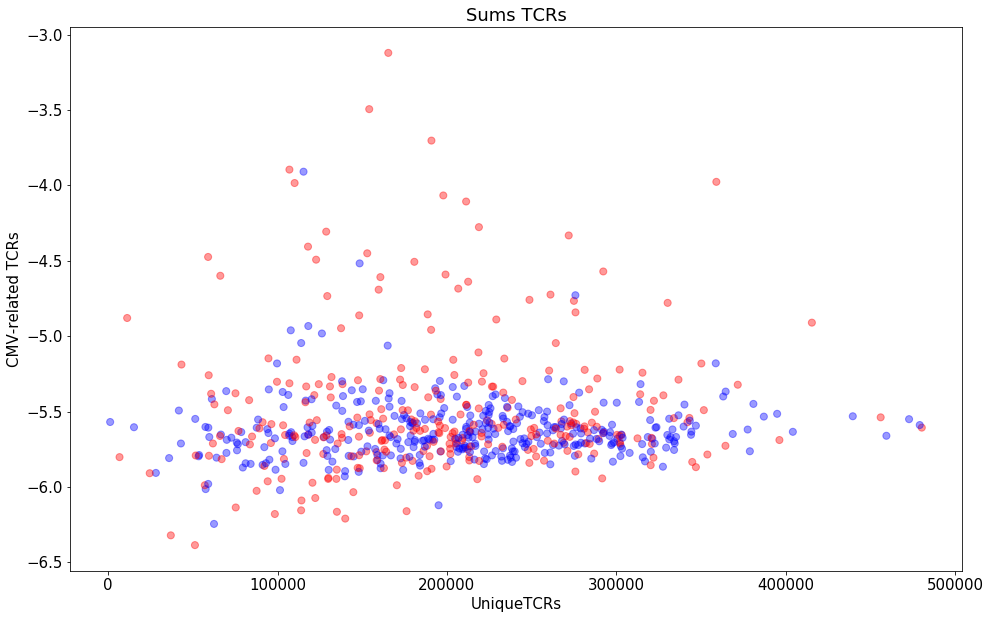

In [64]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s['unique_TCR'], np.log(meta_s['CMV_count'] / meta_s['sum_count']), 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related TCRs')
plt.title('Sums TCRs')

# На будущее

In [164]:
res = pd.merge(all_cdr3s, found_cdr3s, how='left', 
               left_on=['count', 'frequency', 'CDR3nt', 'CDR3aa', 'V', 'D', 'J'],
               right_on=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j'], 
               suffixes=('_ALL', '_CMV'))
res.head()

,count,frequency,CDR3nt,CDR3aa,V,D,J,freq,cdr3nt,cdr3aa,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,NaN,NaN,GATGGATCCATCTCCACTCTGACGATCCAGCGCACAGAGCAGCGGG...,GASSFS,BV07-06,TRBD1,BJ02-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,ACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACA...,CSAKDYTEAFF,BV20-01,TRBD1,BJ01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ACTCTGACGATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATC...,CASSFYNEQFF,BV07-02,TRBD1,BJ02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,ACTCTGAAGGTGCAGCCTGCAGAACTGGAGGATTCTGGAGTTTATT...,CASSQNNEQFF,BV14-01,TRBD1,BJ02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,GAGGATTTCCCGCTCAGGCTGCTGTCGGCTGCTCCCTCCCAGACAT...,CANPELFF,BV06-05,TRBD1,BJ02-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
